In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


Normalizing the images

In [ ]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

In [ ]:
class_labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}

Display 10 random images

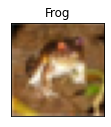

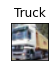

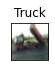

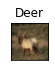

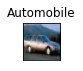

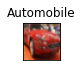

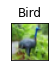

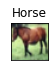

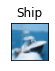

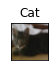

In [ ]:
plt.figure(figsize=(8, 10))

for i in range(10):
  plt.subplot(5, 2, i+1)
  plt.imshow(x_train[i])
  plt.title(class_labels[y_train[i][0]])
  plt.xticks([])
  plt.yticks([])
  plt.show()

Model Building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters= 64, kernel_size=(3,3),  padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [ ]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

In [ ]:
history = model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 128s 81ms/step - loss: 1.6323 - accuracy: 0.4151
Epoch 2/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.2406 - accuracy: 0.5773
Epoch 3/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.1095 - accuracy: 0.6282
Epoch 4/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.0190 - accuracy: 0.6641
Epoch 5/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.9748 - accuracy: 0.6810
Epoch 6/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.9589 - accuracy: 0.6906
Epoch 7/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.9621 - accuracy: 0.6954
Epoch 8/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9713 - accuracy: 0.6933
Epoch 9/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.9878 - accuracy: 0.6922
Epoch 10/10
1563/1563 [==============================] 

Model Performance

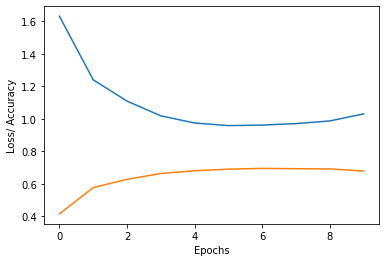

In [ ]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['accuracy'], label="ACCURACY")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Accuracy')

plt.show()

Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.1059 - accuracy: 0.6334


In [ ]:
print("Test accuracy: {}".format(test_accuracy))
print("log loss: {}".format(test_loss))

Test accuracy: 0.633400022983551
log loss: 1.1058595180511475


Model Prediction

In [ ]:
prob = model.predict(x_test)
print(prob)
pred = np.argmax(prob, axis = 1)

[[1.05930477e-01 1.66525990e-02 8.11653435e-02 ... 2.45175511e-02
  1.19842984e-01 3.15859616e-02]
 [1.88467093e-02 6.59040511e-01 1.45527974e-06 ... 1.72706635e-07
  2.60641009e-01 6.14692234e-02]
 [1.63116917e-01 8.06396529e-02 5.90814315e-02 ... 2.08514296e-02
  2.72955716e-01 2.01756194e-01]
 ...
 [4.50460017e-02 2.48315651e-03 1.70824632e-01 ... 7.24050626e-02
  7.30739906e-02 1.10835694e-02]
 [1.00561298e-01 8.06293190e-02 1.09798737e-01 ... 4.72036898e-02
  1.45894542e-01 1.04611330e-01]
 [3.57305180e-06 1.88906182e-10 2.73853680e-03 ... 8.78798127e-01
  8.81618736e-12 2.59920840e-09]]


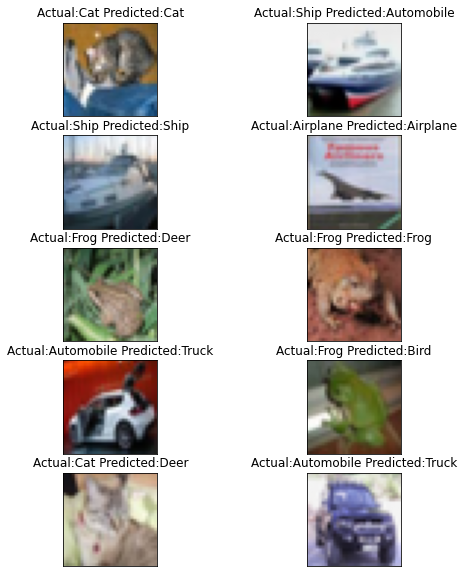

In [ ]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(x_test[i])
    string = "Actual:"+ class_labels[y_test[i][0]] + " Predicted:" + class_labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()